### Import & Load Data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
df_customer = pd.read_csv('dataset_customer.csv')

In [25]:
df_product = pd.read_csv('dataset_product.csv')

In [26]:
df_store = pd.read_csv('dataset_store.csv')

In [27]:
df_transaction = pd.read_csv('dataset_transaction.csv')

### Data Cleansing

In [28]:
df_customer['Income'] = df_customer['Income'].replace('[,]','.',regex=True).astype(float)
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.0
1,2,60,1,Married,6.0
2,3,32,1,Married,9.0
3,4,31,1,Married,4.0
4,5,58,1,Married,3.0


In [29]:
df_store['Latitude'] = df_store['Latitude'].replace('[,]','.',regex=True).astype(float)
df_store['Longitude'] = df_store['Longitude'].replace('[,]','.',regex=True).astype(float)
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.0,NaN
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.0,NaN
2,3,Prima Kota,Prima,Modern Trade,-7.0,NaN
3,4,Gita Ginara,Gita,General Trade,-6.0,NaN
4,5,Bonafid,Gita,General Trade,-7.0,NaN


In [30]:
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'], format='%d/%m/%Y')
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


## Data Merge

In [31]:
df_merge = pd.merge(df_transaction, df_customer, on='CustomerID')
df_merge = pd.merge(df_merge, df_store, on='StoreID')
df_merge = pd.merge(df_merge, df_product, on='ProductID')

df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.0,Prestasi Utama,Prestasi,General Trade,-2.0,NaN,Crackers,7500
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.0,Prima Tendean,Prima,Modern Trade,-6.0,NaN,Yoghurt,10000
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.0,Gita Ginara,Gita,General Trade,-6.0,NaN,Choco Bar,8800
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.0,Gita Ginara,Gita,General Trade,-6.0,NaN,Choco Bar,8800
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.0,Gita Ginara,Gita,General Trade,-6.0,NaN,Yoghurt,10000


## Data Frame Regression

In [32]:
df_regression = df_merge.groupby(['Date']).agg({'Qty': 'sum'}).reset_index()
df_regression

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


In [33]:
# Group the data by 'Date' and aggregate the 'Qty' column using sum
df_regression = df_merge.groupby(['Date']).agg({'Qty': 'sum'}).reset_index()

# Convert the 'Date' column to datetime format
df_regression['Date'] = pd.to_datetime(df_regression['Date'])

# Set 'Date' as the index
df_regression.set_index('Date', inplace=True)

# Display the first few rows of the dataframe
print(df_regression.head())

            Qty
Date           
2022-01-01   49
2022-01-02   59
2022-01-03   63
2022-01-04   45
2022-01-05   30


### Splitting Data (Train-Test)

In [34]:
# Split the data into 90% training and 10% testing
train_size = int(len(df_regression) * 0.9)

# Create training and testing datasets
df_train = df_regression.iloc[:train_size]
df_test = df_regression.iloc[train_size:]

# Extract the target variable (Qty) for the model
y_train = df_train['Qty']
y_test = df_test['Qty']

### Training Model ARIMA

In [37]:
# Train the ARIMA model with the best parameters
ARIMA_model = ARIMA(y_train, order=(40,2,1)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

### Prediction ARIMA

In [38]:
# Generate forecast
y_pred = ARIMA_model.get_forecast(len(df_test))

# Convert predictions to a DataFrame
y_pred_df = y_pred.conf_int()
y_pred_df['Predictions'] = ARIMA_model.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['Predictions']

### Model Evaluation

In [39]:
# Model evaluation function
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    return mae, rmse

# Evaluate predictions
evaluate_model(y_test, y_pred_out)

Mean Absolute Error (MAE): 11.30
Root Mean Squared Error (RMSE): 14.30


(11.30067669959999, 14.2991667067729)

### Forecast Describe

In [40]:
# Display forecast statistics
print("\nForecast Summary Statistics:")
print(y_pred_out.describe())


Forecast Summary Statistics:
count    37.000000
mean     46.992367
std       3.717815
min      35.384054
25%      44.542318
50%      46.920421
75%      49.332789
max      53.345487
Name: Predictions, dtype: float64


### Visualization

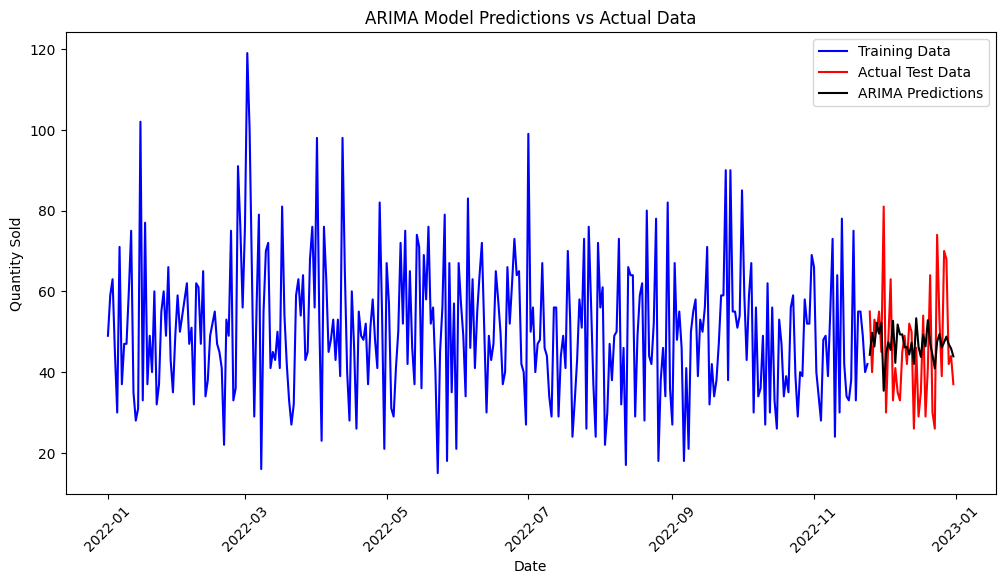

In [41]:
# Plot results
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(df_train.index, df_train['Qty'], label='Training Data', color='blue')

# Plot actual test data
plt.plot(df_test.index, df_test['Qty'], label='Actual Test Data', color='red')

# Plot ARIMA predictions
plt.plot(df_test.index, y_pred_out, label='ARIMA Predictions', color='black')

# Formatting
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.title("ARIMA Model Predictions vs Actual Data")
plt.legend()
plt.xticks(rotation=45)
plt.show()